In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import iowa_data_funcs as idf

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from sklearn.model_selection import train_test_split

ai_df = idf.load_iowa('train.csv')
X_train, X_test, y_train, y_test = train_test_split(ai_df, ai_df.SalePrice, test_size=0.2, random_state=42)

In [111]:
corr_matrix = X_train.corr()
corr_matrix = corr_matrix['SalePrice'].sort_values(ascending=False)[:16]

relevant_columns = []
for i in corr_matrix.index:
    relevant_columns.append(i)
relevant_columns.remove('SalePrice')

X = X_train[relevant_columns]

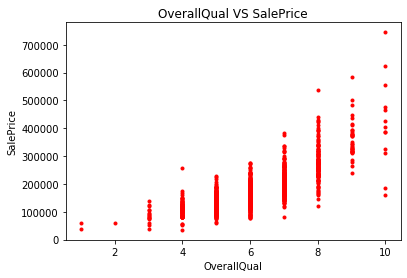

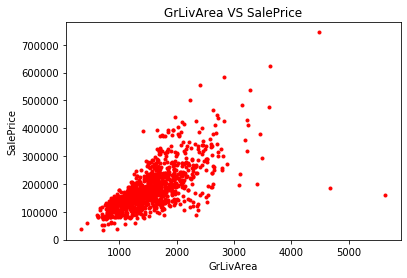

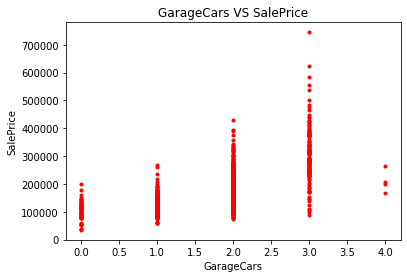

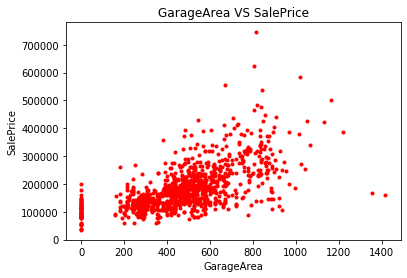

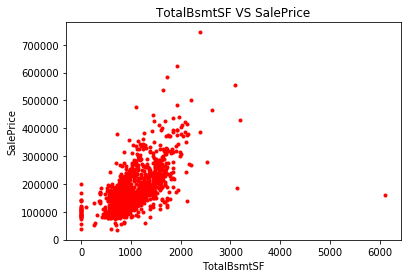

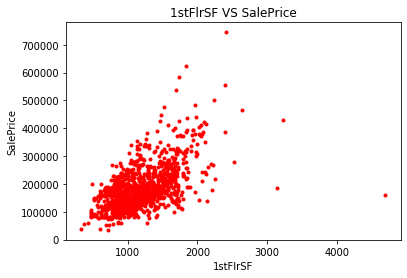

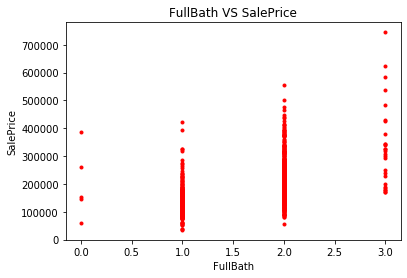

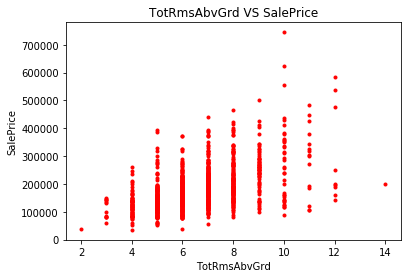

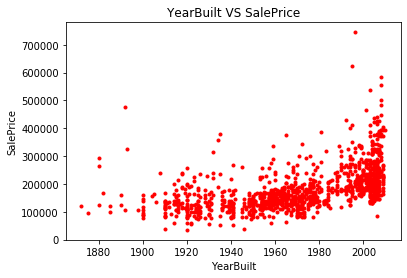

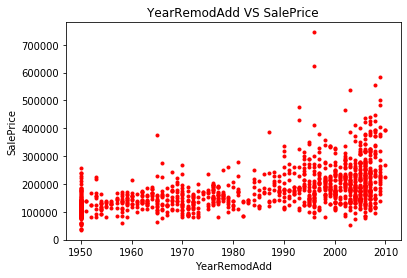

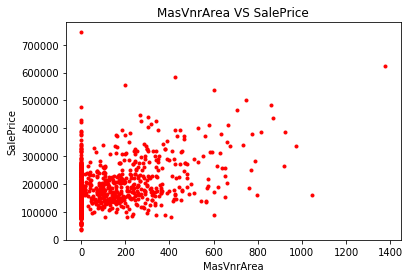

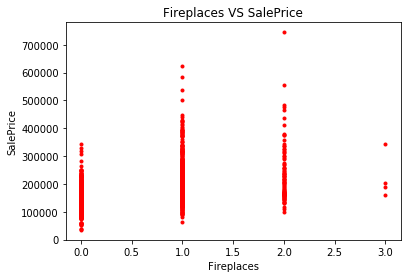

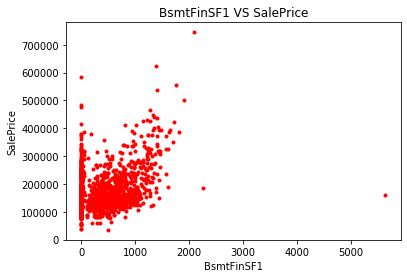

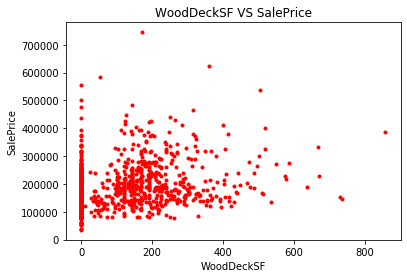

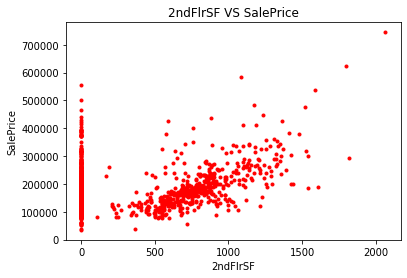

In [112]:
def plot_feature(X, y, title):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_title(title +' VS SalePrice')    
    ax.set_xlabel(title)
    ax.set_ylabel('SalePrice')
    ax.plot(X, y, 'r.')
    plt.show()


for i in relevant_columns:
    plot_feature(X[i], y_train, i)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9850AEB08>,
      dtype=object)

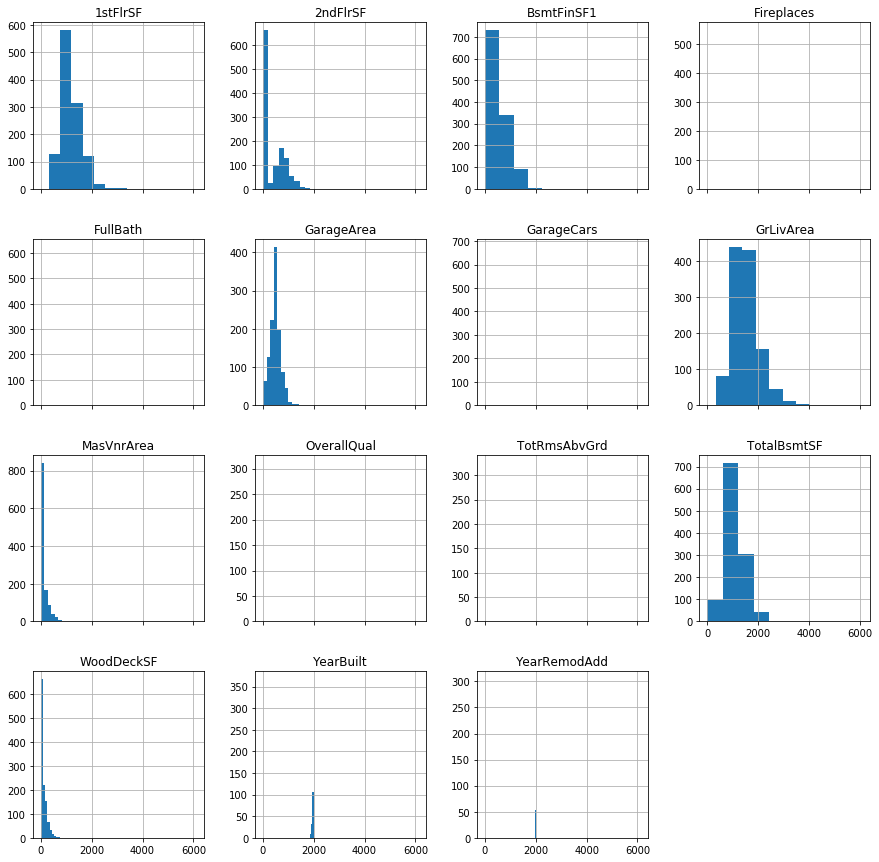

In [113]:
X.hist(figsize=((15,15)), sharex=True)

In [114]:
X.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,6.121575,1527.401541,1.781678,476.273973,1061.771404,1169.354452,1.577055,6.561644,1970.965753,1984.897260,103.238870,0.618151,446.023973,95.946918,352.351027
std,1.367619,524.432686,0.740161,211.095373,440.676330,386.675268,0.546912,1.619706,30.675495,20.733955,172.746354,0.645129,459.070977,129.685939,439.570872
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1145.750000,1.000000,341.000000,796.000000,888.000000,1.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1473.000000,2.000000,482.000000,997.500000,1095.000000,2.000000,6.000000,1972.000000,1994.000000,0.000000,1.000000,384.500000,0.000000,0.000000
75%,7.000000,1792.000000,2.000000,576.000000,1299.250000,1396.750000,2.000000,7.000000,2001.000000,2004.000000,166.000000,1.000000,721.000000,168.000000,728.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,1378.000000,3.000000,5644.000000,857.000000,2065.000000


In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=relevant_columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B987571BC8>,
      dtype=object)

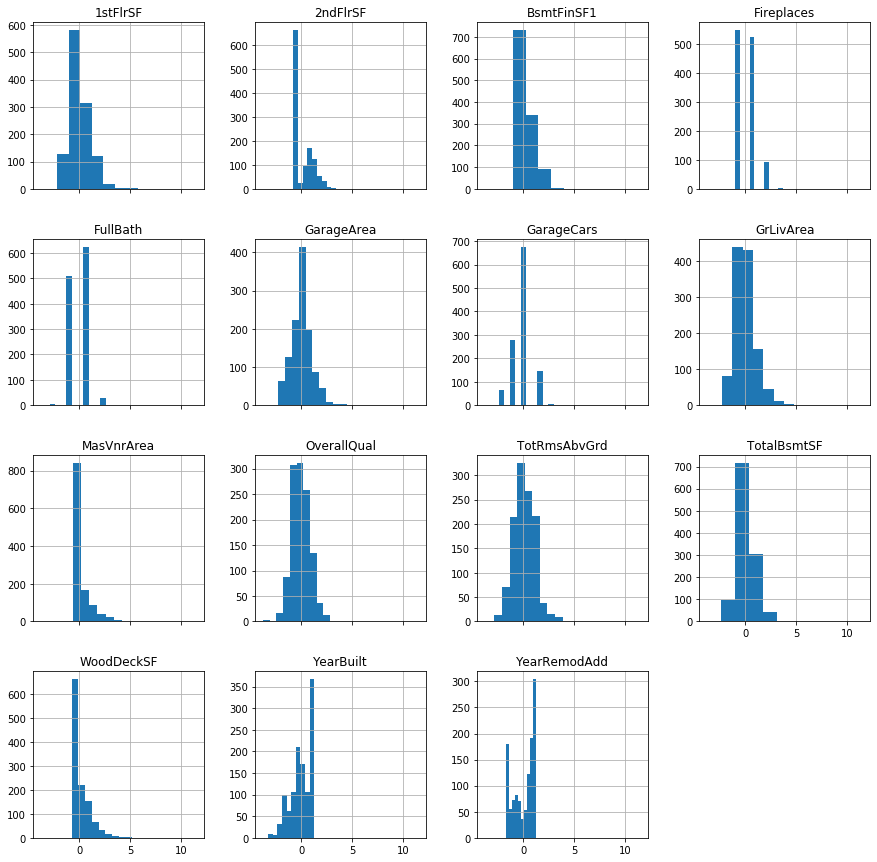

In [116]:
X_scaled.hist(figsize=((15,15)), sharex=True)

In [117]:
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF
Id,,,,,,,,,,,,,,,
255,5,1314,1,294,1314,1314,1,5,1957,1957,0.0,0,922,250,0
1067,6,1571,2,380,799,799,2,7,1993,1994,0.0,1,0,0,772
639,5,796,0,0,796,796,1,4,1910,1950,0.0,0,0,328,0
800,5,1768,1,240,731,981,1,7,1937,1950,252.0,2,569,0,787
381,5,1691,1,308,1026,1026,2,6,1924,1950,0.0,1,218,0,665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,6,1314,2,440,1314,1314,2,6,2006,2006,0.0,1,24,0,0
1131,4,1981,2,576,1122,1328,2,7,1928,1950,0.0,2,622,431,653
1295,5,864,2,572,864,864,1,5,1955,1990,0.0,0,167,0,0


In [118]:
X_scaled

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF
0,-0.820445,-0.407093,-1.056544,-0.863837,0.572612,0.374235,-1.055566,-0.964566,-0.455469,-1.346063,-0.597889,-0.958592,1.037269,1.188402,-0.801923
1,-0.088934,0.083170,0.295092,-0.456264,-0.596547,-0.958202,0.773664,0.270755,0.718609,0.439214,-0.597889,0.592150,-0.971996,-0.740157,0.955088
2,-0.820445,-1.395250,-2.408179,-2.257169,-0.603357,-0.965964,-1.055566,-1.582227,-1.988293,-1.683818,-0.597889,-0.958592,-0.971996,1.790113,-0.801923
3,-0.820445,0.458975,-1.056544,-1.119755,-0.750921,-0.487321,-1.055566,0.270755,-1.107734,-1.683818,0.861522,2.142892,0.267995,-0.740157,0.989227
4,-0.820445,0.312087,-1.056544,-0.797488,-0.081209,-0.370895,0.773664,-0.346905,-1.531707,-1.683818,-0.597889,0.592150,-0.496920,-0.740157,0.711564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.088934,-0.407093,0.295092,-0.171910,0.572612,0.374235,0.773664,-0.346905,1.142582,1.018222,-0.597889,0.592150,-0.919694,-0.740157,-0.801923
1164,-1.551955,0.865302,0.295092,0.472624,0.136732,0.410457,0.773664,0.270755,-1.401254,-1.683818,-0.597889,2.142892,0.383495,2.584680,0.684253
1165,-0.820445,-1.265531,0.295092,0.453667,-0.448983,-0.790030,-1.055566,-0.964566,-0.520696,0.246211,-0.597889,-0.958592,-0.608062,-0.740157,-0.801923
1166,0.642577,-0.193438,-1.056544,-1.233497,-0.340013,-0.665842,-1.055566,0.270755,-1.727387,0.632217,-0.597889,0.592150,-0.971996,-0.740157,0.367900


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9890B6708>,
      dtype=object)

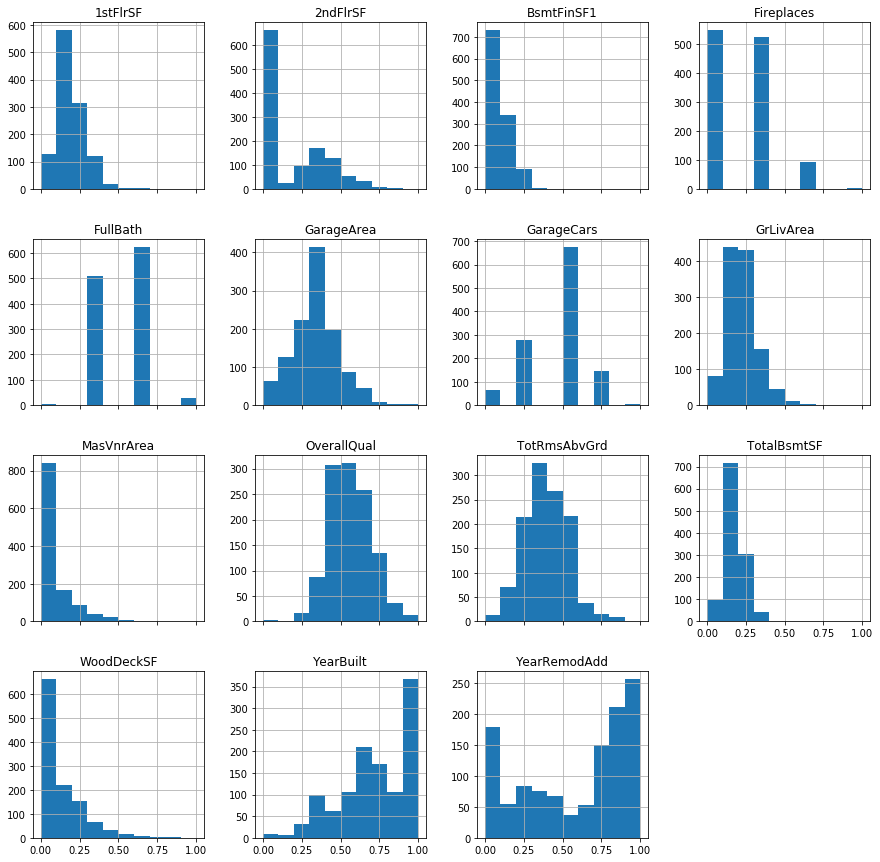

In [119]:
# lets try a different kind of scaler
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
X_minmax = pd.DataFrame(min_max.fit_transform(X), columns=relevant_columns)
X_minmax.hist(figsize=((15,15)), sharex=True)

In [120]:
X_minmax.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF
count,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.569064,0.224831,0.44542,0.335877,0.173776,0.191683,0.525685,0.380137,0.717143,0.581621,0.074919,0.206050,0.079026,0.111957,0.170630
std,0.151958,0.098800,0.18504,0.148868,0.072124,0.088728,0.182304,0.134975,0.222286,0.345566,0.125360,0.215043,0.081338,0.151325,0.212867
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.444444,0.152930,0.25000,0.240480,0.130278,0.127123,0.333333,0.250000,0.586957,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.555556,0.214582,0.50000,0.339915,0.163257,0.174621,0.666667,0.333333,0.724638,0.733333,0.000000,0.333333,0.068125,0.000000,0.000000
75%,0.666667,0.274680,0.50000,0.406206,0.212643,0.243862,0.666667,0.416667,0.934783,0.900000,0.120464,0.333333,0.127746,0.196033,0.352542
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
X_scaled.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03
mean,-5.170902e-17,-1.307934e-16,2.585451e-17,3.650048e-17,1.961901e-16,-1.855441e-16,-5.475072e-17,-1.520853e-17,-1.417435e-15,4.653812e-15,-4.562560e-18,1.110223e-16,6.463627e-18,-7.148011e-17,4.562560e-18
std,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00
min,-3.746488e+00,-2.276580e+00,-2.408179e+00,-2.257169e+00,-2.410445e+00,-2.161277e+00,-2.884795e+00,-2.817548e+00,-3.227597e+00,-1.683818e+00,-5.978887e-01,-9.585921e-01,-9.719957e-01,-7.401575e-01,-8.019229e-01
25%,-8.204446e-01,-7.280534e-01,-1.056544e+00,-6.410937e-01,-6.033572e-01,-7.279363e-01,-1.055566e+00,-9.645659e-01,-5.859221e-01,-9.118065e-01,-5.978887e-01,-9.585921e-01,-9.719957e-01,-7.401575e-01,-8.019229e-01
50%,-8.893368e-02,-1.037785e-01,2.950917e-01,2.713693e-02,-1.459097e-01,-1.923741e-01,7.736639e-01,-3.469053e-01,3.373017e-02,4.392138e-01,-5.978887e-01,5.921497e-01,-1.340758e-01,-7.401575e-01,-8.019229e-01
75%,6.425772e-01,5.047584e-01,2.950917e-01,4.726240e-01,5.391266e-01,5.883308e-01,7.736639e-01,2.707553e-01,9.795152e-01,9.217210e-01,3.634694e-01,5.921497e-01,5.992403e-01,5.558347e-01,8.549472e-01
max,2.837110e+00,7.849169e+00,2.998363e+00,4.463051e+00,1.146055e+01,9.113990e+00,2.602894e+00,4.594380e+00,1.273035e+00,1.211225e+00,7.382542e+00,3.693633e+00,1.132767e+01,5.870946e+00,3.897853e+00


In [122]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):

        return X[self.columns]
 

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('ColumnSelector', ColumnSelector(relevant_columns)),
    ('min_max', MinMaxScaler())
])


In [124]:
X_prepd = pipeline.fit_transform(X_train)

In [139]:
lin_reg.fit(X_prepd, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
#lets use cross_val_score to split our training set
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()

'''cross_val_score(estimator, X, y, scoring= , cv= )'''
scores = cross_val_score(lin_reg, X_prepd, y_train, 
                        scoring='neg_mean_squared_error', cv=10)
#cv is the amount of different times the model will be evaluated
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    '''This function displays the results in a neat way to look at'''
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('std: ', scores.std())

display_scores(tree_rmse_scores)

Scores:  [27475.50214289 42999.34333594 28601.92698089 45318.73371468
 66522.81696658 40532.80386801 32462.71510946 26457.91693632
 26261.43519143 30378.65660097]
Mean:  36701.18508471635
std:  12002.096043081743


In [141]:
X_test_prepd = pipeline.fit_transform(X_test)

scores = cross_val_score(lin_reg, X_test_prepd, y_test, scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-scores)

display_scores(lin_reg_scores)

Scores:  [25441.49236831 35139.36460315 48024.65252239 40590.53673845
 56366.96847118 50831.3951142  32084.86390232 19812.53195216
 28443.54749574 33457.8003175 ]
Mean:  37019.31534853999
std:  11149.918773722771


In [251]:
test_df = idf.load_iowa('test.csv')

index = test_df.Id

In [252]:
test_df_prepd = pipeline.transform(test_df)
lin_reg.fit(X_prepd, y_train)
predictions = lin_reg.predict(test_df_prepd)

In [253]:
predictions = pd.DataFrame(predictions, index=index)
#predictions = pd.concat([Id, predictions], axis=1)

In [254]:
predictions.columns = ['SalePrice']

predictions.to_csv('03S_submission.csv')

In [255]:
predictions

,SalePrice
Id,
1461,105954.067130
1462,163934.302850
1463,179458.118022
1464,198327.534324
1465,199698.658387
...,...
2915,63648.771439
2916,84164.857442
2917,180363.136771


In [228]:
df = pd.read_csv('03S_submission.csv')

In [229]:
df

,Unnamed: 0,Id,SalePrice
0,0,1461,105954.067130
1,1,1462,163934.302850
2,2,1463,179458.118022
3,3,1464,198327.534324
4,4,1465,199698.658387
...,...,...,...
1454,1454,2915,63648.771439
1455,1455,2916,84164.857442
1456,1456,2917,180363.136771
1457,1457,2918,108559.095476
